In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from datasets.cifar import arrowedCIFAR, chromaCIFAR
import torch
from models.extractor import Resnet_FC
from models.lens import Unet_ResNet
from arguments import parse_args
from pathlib import Path
import torch.nn as nn
import torchvision.models as models
import torch.nn as nn

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
trainset = arrowedCIFAR(train=True, clean_data=True)
testset = arrowedCIFAR(train=False, clean_data=True)

Files already downloaded and verified


100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:47<00:00, 465.85it/s]


Files already downloaded and verified


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:20<00:00, 483.86it/s]


In [5]:
path = Path('../')

In [6]:
output_dir = 'checkpoints'
model_name = '007'
lens_usage = True

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [59]:
if lens_usage:
    model1 = torch.load(path/f'{output_dir}/{model_name}/lens_6.25e-12_4.pth' , map_location=torch.device('cpu'))
    model1.to(device)
else:
    model1 = None
model2 = torch.load(path/f'{output_dir}/{model_name}/extractor_6.25e-12_4.pth', map_location=torch.device('cpu'))
model2.to(device)

Resnet_FC(
  (res): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0

In [60]:
batch_size = 4
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True)

### Original photo

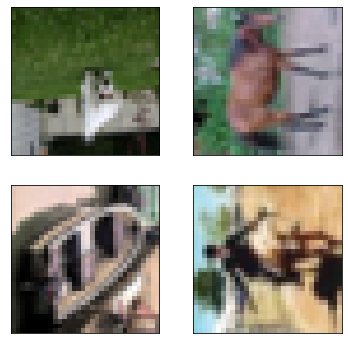

In [74]:
imgs, labels = iter(testloader).next()
fig = plt.figure(figsize=(6,6))
row = 2
cols = 2
for i in range(imgs.shape[0]):
    ax = fig.add_subplot(row, cols, i+1, xticks=[], yticks=[])
    img = imgs[i]/2 + 0.5
    img = np.transpose(img, (1, 2, 0))
    ax.imshow(img)
plt.show()

### After Lens

In [75]:
model2.eval()
model1.eval()
with torch.no_grad():
    if lens_usage:
        img_lensed = model1(imgs.to(device))
        pred = model2(img_lensed)
    else:
        pred = model2(imgs.to(device))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


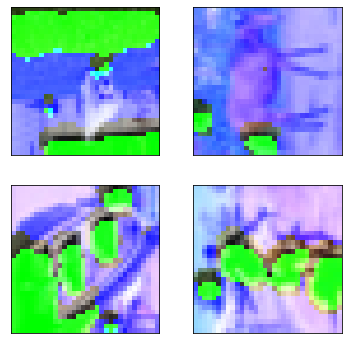

In [76]:
fig = plt.figure(figsize=(6,6))
for i in range(img_lensed.shape[0]):
    ax = fig.add_subplot(row, cols, i+1, xticks=[], yticks=[])
    img = (img_lensed[i].squeeze())/2 + 0.5
    img = np.transpose(img, (1, 2, 0))
    ax.imshow(img)
plt.show()

### Comparing the patch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


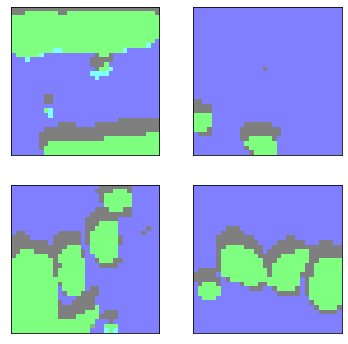

In [77]:
fig = plt.figure(figsize=(6,6))
for i in range(img_lensed.shape[0]):
    ax = fig.add_subplot(row, cols, i+1, xticks=[], yticks=[])
    img = (img_lensed[i].squeeze() - imgs[i])/2 + 0.5
    img = np.transpose(img, (1, 2, 0))
    ax.imshow(img)
plt.show()